# Análise de consórcios

In [1]:
import pandas as pd
import glob
import geopandas as gpd
import matplotlib.pyplot as plt
import squarify

### Cadastro de segmentos

In [2]:
segmentos = pd.DataFrame(
    data=[
        ['1', 'Bens Imóveis'],
        ['2', 'Meios de transporte industriais e comerciais'],
        ['3', 'Demais veículos automotores'],
        ['4', 'Motocicletas e motonetas'],
        ['5', 'Outros bens móveis duráveis'],
        ['6', 'Serviços turísticos']
    ],
    columns=['Código', 'Segmento']
)
segmentos['Código'] = segmentos['Código'].astype(int)
segmentos

,Código,Segmento
0,1,Bens Imóveis
1,2,Meios de transporte industriais e comerciais
2,3,Demais veículos automotores
3,4,Motocicletas e motonetas
4,5,Outros bens móveis duráveis
5,6,Serviços turísticos


In [ ]:
filenames = glob.glob('*UF.csv')
consolidado_trimestres = pd.DataFrame(columns=['Data_base', 'Nome_da_Administradora', 'Código_do_segmento', 
                                               'Unidade_da_Federação_do_consorciado', 'Quantidade_de_adesões_no_trimestre'])

for f in filenames:
    df = pd.read_csv(f, sep=';', encoding='latin1')
    consolidado_trimestres = pd.concat([consolidado_trimestres, df], ignore_index=True)
    #print(df)


consolidado_trimestres['Código_do_segmento'] = consolidado_trimestres['Código_do_segmento'].astype(int)
consolidado_trimestres = consolidado_trimestres.merge(
    segmentos, 
    how='left', 
    left_on='Código_do_segmento', 
    right_on='Código'
)

# Removendo a coluna duplicada 'Código' se não for necessária
consolidado_trimestres.drop(columns=['Código_do_segmento', 'Código'], inplace=True)
consolidado_trimestres

,#Data_base,Nome_da_Administradora,Unidade_da_Federação_do_consorciado,Quantidade_de_adesões_no_trimestre,Segmento
0,202212,ITAÚ ADM DE CONSÓRCIOS LTDA ...,AC,8,Bens Imóveis
1,202212,ITAÚ ADM DE CONSÓRCIOS LTDA ...,AC,1,Meios de transporte industriais e comerciais
2,202212,ITAÚ ADM DE CONSÓRCIOS LTDA ...,AC,43,Demais veículos automotores
3,202212,ITAÚ ADM DE CONSÓRCIOS LTDA ...,AC,11,Motocicletas e motonetas
4,202212,ITAÚ ADM DE CONSÓRCIOS LTDA ...,AL,22,Bens Imóveis
...,...,...,...,...,...
49503,202406,SCANIA ADM CONS LTDA. ...,RS,99,Meios de transporte industriais e comerciais
49504,202406,SCANIA ADM CONS LTDA. ...,SC,86,Meios de transporte industriais e comerciais
49505,202406,SCANIA ADM CONS LTDA. ...,SE,4,Meios de transporte industriais e comerciais
49506,202406,SCANIA ADM CONS LTDA. ...,SP,65,Meios de transporte industriais e comerciais


In [4]:
adesoes_por_emp = consolidado_trimestres.groupby(['Nome_da_Administradora', 'Unidade_da_Federação_do_consorciado'], as_index=False)['Quantidade_de_adesões_no_trimestre'].sum()
adesoes_por_emp

,Nome_da_Administradora,Unidade_da_Federação_do_consorciado,Quantidade_de_adesões_no_trimestre
0,ADEMICON ADM CONS S.A. ...,AC,252
1,ADEMICON ADM CONS S.A. ...,AL,915
2,ADEMICON ADM CONS S.A. ...,AM,619
3,ADEMICON ADM CONS S.A. ...,AP,118
4,ADEMICON ADM CONS S.A. ...,BA,2218
...,...,...,...
2822,ÂNCORA ADM CONS S.A. ...,RS,1967
2823,ÂNCORA ADM CONS S.A. ...,SC,4404
2824,ÂNCORA ADM CONS S.A. ...,SE,229
2825,ÂNCORA ADM CONS S.A. ...,SP,15685


### Confiabilidade de administradoras (quantidade de adesões)

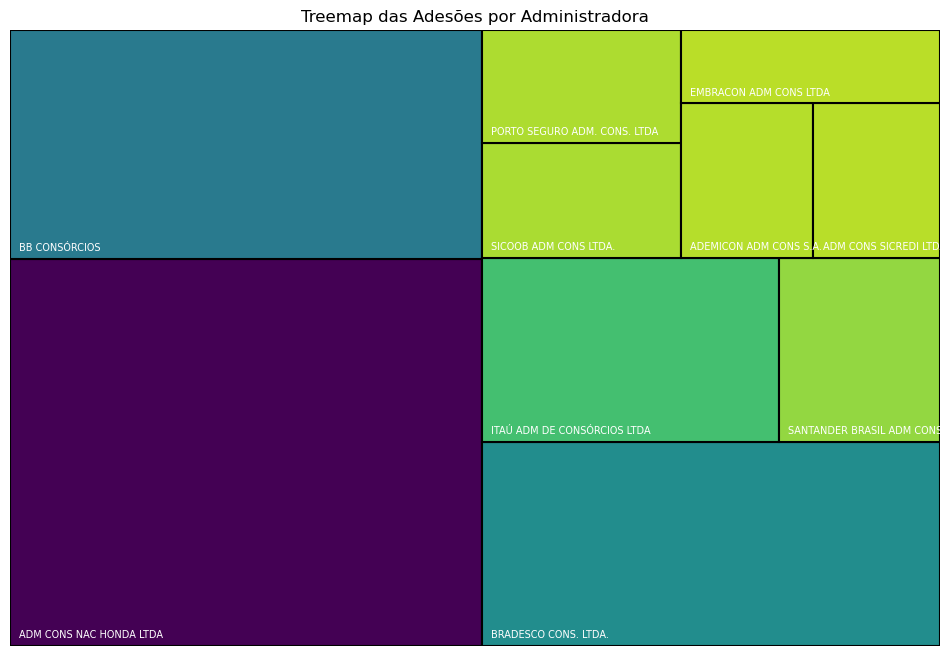

In [21]:
import matplotlib.pyplot as plt
import squarify

# Preparando os dados
resultado_adms = adesoes_por_emp.groupby(["Nome_da_Administradora"], as_index=False)['Quantidade_de_adesões_no_trimestre'].sum()
ranking = resultado_adms.sort_values(['Quantidade_de_adesões_no_trimestre'], ascending=False)
ranking = ranking[ranking['Quantidade_de_adesões_no_trimestre'] != 0].head(10)

sizes = ranking['Quantidade_de_adesões_no_trimestre']
labels = ranking['Nome_da_Administradora']

# Normalizando os tamanhos das áreas
rects = squarify.normalize_sizes(sizes, 100, 100)  # Apenas a lista de tamanhos e as dimensões de normalização
rects = squarify.squarify(rects, 0, 0, 100, 100)

# Criando o gráfico de treemap
fig, ax = plt.subplots(figsize=(12, 8))

# Plotando as áreas com bordas e rótulos
for rect, label, size in zip(rects, labels, sizes):
    x, y, dx, dy = rect['x'], rect['y'], rect['dx'], rect['dy']
    ax.add_patch(plt.Rectangle((x, y), dx, dy, color=plt.cm.viridis_r(size / max(sizes)), ec="black", linewidth=1.5))
    
    # Adicionando rótulos somente se couberem no retângulo
    if dx > 10 and dy > 5:  # Limites mínimos para o texto caber
        ax.text(
            x + 1, y + 1, label,  # Posição no canto superior esquerdo com uma pequena margem
            fontsize=7,
            color='white',
            va='bottom', ha='left',
            clip_on=True  # Garante que o texto não saia da área do retângulo
        )

# Ajustando o gráfico
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
ax.axis('off')
plt.title('Treemap das Adesões por Administradora')

plt.show()


### Adesão de consorcios por estado

In [15]:
resultado_adms = adesoes_por_emp.groupby(['Unidade_da_Federação_do_consorciado'], as_index=False)['Quantidade_de_adesões_no_trimestre'].sum()
adesoes_por_est = resultado_adms.sort_values(['Quantidade_de_adesões_no_trimestre'], ascending=False)
adesoes_por_est

,Unidade_da_Federação_do_consorciado,Quantidade_de_adesões_no_trimestre
25,SP,1404843
10,MG,624712
17,PR,478566
4,BA,454489
22,RS,322920
18,RJ,291159
13,PA,290142
23,SC,264646
8,GO,262838
9,MA,226579


In [16]:
resultado_adms = adesoes_por_emp.groupby(["Nome_da_Administradora", 'Unidade_da_Federação_do_consorciado'], as_index=False)['Quantidade_de_adesões_no_trimestre'].sum()
resultado_adms.groupby(['Unidade_da_Federação_do_consorciado', 'Nome_da_Administradora'], as_index=False)['Quantidade_de_adesões_no_trimestre'].sum()

,Unidade_da_Federação_do_consorciado,Nome_da_Administradora,Quantidade_de_adesões_no_trimestre
0,AC,ADEMICON ADM CONS S.A. ...,252
1,AC,ADM CONS NAC HONDA LTDA ...,7984
2,AC,ADM CONS NACIONAL VALOR S.A. ...,1
3,AC,ADM CONS RCI BRASIL LTDA ...,46
4,AC,ADM CONS SICREDI LTDA ...,536
...,...,...,...
2822,TO,XS5 ADM CONS S.A. ...,1318
2823,TO,YAMAHA ADM CONS LTDA ...,4239
2824,TO,ZEMA ADM. CONSÓRCIO LTDA ...,150
2825,TO,ÁPICE ADM DE CONSORCIO LTDA ...,4


In [19]:
path_sf = r'Shapes\BR_Municipios_2022.shp'
geo_df = gpd.read_file(path_sf)
geo_df

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,1100015,Alta Floresta D'Oeste,RO,7067.127,"POLYGON ((-62.00806 -12.13379, -62.00784 -12.2..."
1,1100023,Ariquemes,RO,4426.571,"POLYGON ((-63.17933 -10.13924, -63.17746 -10.1..."
2,1100031,Cabixi,RO,1314.352,"POLYGON ((-60.52408 -13.32137, -60.37162 -13.3..."
3,1100049,Cacoal,RO,3793.000,"POLYGON ((-61.35502 -11.50452, -61.35524 -11.5..."
4,1100056,Cerejeiras,RO,2783.300,"POLYGON ((-60.82135 -13.1191, -60.81773 -13.12..."
...,...,...,...,...,...
5567,5222005,Vianópolis,GO,954.115,"POLYGON ((-48.31126 -16.84221, -48.3117 -16.84..."
5568,5222054,Vicentinópolis,GO,733.794,"POLYGON ((-49.73613 -17.74427, -49.73624 -17.7..."
5569,5222203,Vila Boa,GO,1052.593,"POLYGON ((-47.0778 -15.06364, -47.07799 -15.06..."
5570,5222302,Vila Propício,GO,2181.593,"POLYGON ((-48.58713 -15.31847, -48.58714 -15.3..."


In [20]:
geo_df = geo_df.merge(adesoes_por_est, how='left', left_on='SIGLA_UF', right_on='Unidade_da_Federação_do_consorciado')
geo_df

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry,Unidade_da_Federação_do_consorciado,Quantidade_de_adesões_no_trimestre
0,1100015,Alta Floresta D'Oeste,RO,7067.127,"POLYGON ((-62.00806 -12.13379, -62.00784 -12.2...",RO,90528
1,1100023,Ariquemes,RO,4426.571,"POLYGON ((-63.17933 -10.13924, -63.17746 -10.1...",RO,90528
2,1100031,Cabixi,RO,1314.352,"POLYGON ((-60.52408 -13.32137, -60.37162 -13.3...",RO,90528
3,1100049,Cacoal,RO,3793.000,"POLYGON ((-61.35502 -11.50452, -61.35524 -11.5...",RO,90528
4,1100056,Cerejeiras,RO,2783.300,"POLYGON ((-60.82135 -13.1191, -60.81773 -13.12...",RO,90528
...,...,...,...,...,...,...,...
5567,5222005,Vianópolis,GO,954.115,"POLYGON ((-48.31126 -16.84221, -48.3117 -16.84...",GO,262838
5568,5222054,Vicentinópolis,GO,733.794,"POLYGON ((-49.73613 -17.74427, -49.73624 -17.7...",GO,262838
5569,5222203,Vila Boa,GO,1052.593,"POLYGON ((-47.0778 -15.06364, -47.07799 -15.06...",GO,262838
5570,5222302,Vila Propício,GO,2181.593,"POLYGON ((-48.58713 -15.31847, -48.58714 -15.3...",GO,262838


### Adesão de consórcios por estado

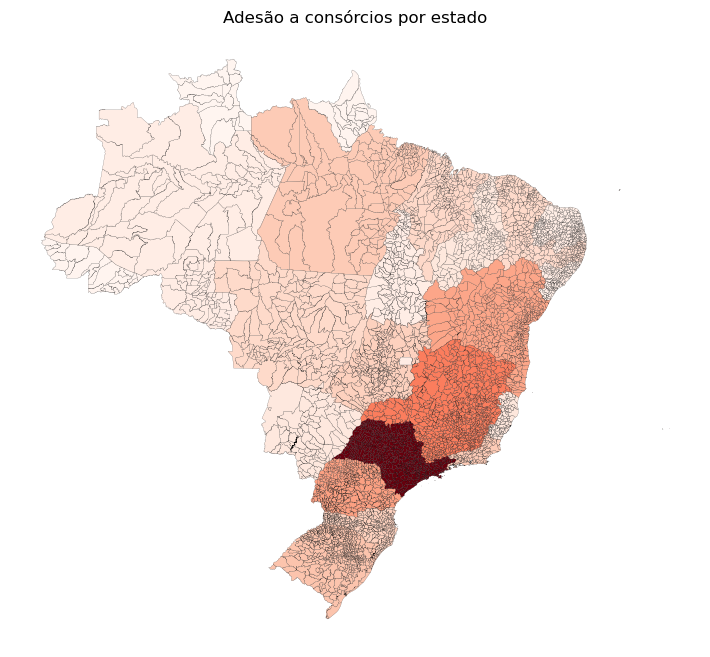

In [21]:
geo_df['Quantidade_de_adesões_no_trimestre'] = pd.to_numeric(geo_df['Quantidade_de_adesões_no_trimestre'], errors='coerce')

# Verificando se existem valores NaN e preenchendo ou removendo conforme necessário
if geo_df['Quantidade_de_adesões_no_trimestre'].isna().any():
    print("Aviso: Existem valores NaN após a conversão. Verifique os dados.")
    # Opcional: Remover ou preencher valores NaN
    geo_df['Quantidade_de_adesões_no_trimestre'].fillna(0, inplace=True)  # Ou geo_df.dropna(subset=['Quantidade_de_adesões_no_trimestre'], inplace=True)

fig, ax = plt.subplots(figsize=(10,8))
# Escala de cores
vmin, vmax = geo_df['Quantidade_de_adesões_no_trimestre'].min(), geo_df['Quantidade_de_adesões_no_trimestre'].quantile(.99)
colors = plt.cm.Reds((geo_df['Quantidade_de_adesões_no_trimestre'] - vmin)/(vmax - vmin))
#geo_df = geo_df[]
geo_df.plot(ax = ax, color = colors, edgecolor='black', linewidth=0.1)
ax.axis('off')
plt.title('Adesão a consórcios por estado')
plt.show()

In [23]:
consolidado_trimestres

,#Data_base,Nome_da_Administradora,Unidade_da_Federação_do_consorciado,Quantidade_de_adesões_no_trimestre,Segmento
0,202212,ITAÚ ADM DE CONSÓRCIOS LTDA ...,AC,8,Bens Imóveis
1,202212,ITAÚ ADM DE CONSÓRCIOS LTDA ...,AC,1,Meios de transporte industriais e comerciais
2,202212,ITAÚ ADM DE CONSÓRCIOS LTDA ...,AC,43,Demais veículos automotores
3,202212,ITAÚ ADM DE CONSÓRCIOS LTDA ...,AC,11,Motocicletas e motonetas
4,202212,ITAÚ ADM DE CONSÓRCIOS LTDA ...,AL,22,Bens Imóveis
...,...,...,...,...,...
49503,202406,SCANIA ADM CONS LTDA. ...,RS,99,Meios de transporte industriais e comerciais
49504,202406,SCANIA ADM CONS LTDA. ...,SC,86,Meios de transporte industriais e comerciais
49505,202406,SCANIA ADM CONS LTDA. ...,SE,4,Meios de transporte industriais e comerciais
49506,202406,SCANIA ADM CONS LTDA. ...,SP,65,Meios de transporte industriais e comerciais


### Qual a probabilidade de um meio de transporte industrial em SP ter sido concedido por um consórcio do Itaú?

In [24]:
total_adesoes = consolidado_trimestres['Quantidade_de_adesões_no_trimestre'].sum()
mask1 = (consolidado_trimestres['Unidade_da_Federação_do_consorciado'] == 'SP') & (consolidado_trimestres['Segmento'] == 'Meios de transporte industriais e comerciais')
total_adesoes_industriais_sp = consolidado_trimestres.loc[mask1]['Quantidade_de_adesões_no_trimestre'].sum()
prob_sp = total_adesoes_industriais_sp / total_adesoes

df_itau = consolidado_trimestres[consolidado_trimestres['Nome_da_Administradora'] == consolidado_trimestres['Nome_da_Administradora'][0]]
total_itau = df_itau['Quantidade_de_adesões_no_trimestre'].sum()
prob_itau = total_itau / total_adesoes

mask3 = (consolidado_trimestres['Segmento'] == 'Meios de transporte industriais e comerciais') & (consolidado_trimestres['Nome_da_Administradora'] == consolidado_trimestres['Nome_da_Administradora'][0])
itau_ind = consolidado_trimestres.loc[mask3]['Quantidade_de_adesões_no_trimestre'].sum() / total_adesoes
meio_ind_sp = prob_sp
p3 = (itau_ind * meio_ind_sp) / prob_itau   # Bayes
print("Probabilidade de Meios de transporte industriais e comerciais em SP serem de consórcios do Itaú: " + str(round(p3*100, 2)) + "%")

Probabilidade de Meios de transporte industriais e comerciais em SP serem de consórcios do Itaú: 0.02%
